In [35]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import stats as st
from scipy.stats import wilcoxon
from scipy.stats import f_oneway
import matplotlib.pyplot as plt
import seaborn as sns

<div class="alert alert-info">
<b>Задание № 1 (Обязательно)</b>
Вам даны результаты проверки двух препаратов.
    
Требуется:
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`A` - результаты для группы людей получающих препарат А.

`B` - результаты для другой группы людей, получающих препарат B.
    
</div>

In [10]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

<div class="alert alert-info">
Формулируем нулевую гипотезу Н0 - Группы А и В не различаются , а наблюдаемые различия случайны.
    
Выполним тестирование с помощью критерия Т - Стьюдента
<div>

In [11]:
t , p  = stats.ttest_ind(A, B, equal_var = True)
print("t = " + str(t), "P_value = " + str(p))

t = -1.733800647210997 P_value = 0.08451003973499756


In [12]:
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Одинаковые распределения (не отвергаем H0)


<div class="alert alert-info">
Получаем p-value больше 5%. Не отвергаем Н0 -  различия в группах статистически не значимы!

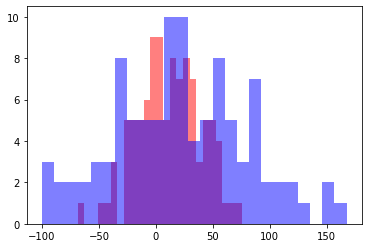

In [13]:
plt.hist(A, color='r', alpha=0.5, bins=25); 
plt.hist(B, color='b',  alpha=0.5, bins=25);

<div class="alert alert-info">
<b>Задание № 2 (Обязательно)</b>
Вам даны результаты проверки двух препаратов. 
    
Требуется: 
- Оценить, есть ли различие в эффекте у этих пациентов?
- Визуально подтвердить результат
    
`А` - группа людей без препарата.

`B` - та же группа людей, но получающая препарат
</div>

In [14]:
np.random.seed(11)
A = stats.norm.rvs(scale=30, loc=11, size=100)
B = A + stats.norm.rvs(scale=54, loc=11, size=100)

 <div class="alert alert-info">
 Также как в 1м задании нулевая гипотеза подразумевает, что различия в группах нет.  
    
 Так как у нас одна группа, и мы смотрим эффект до и после  -  применим критерий Уилкоксона

In [15]:
stat, p = wilcoxon(A, B)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретируем
alpha = 0.05
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1930.000, p=0.041
Разные распределения (отвергаем H0)


 <div class="alert alert-info"> 
 Получаем p-value меньше 5%. Значит отвергаем Н0 - обнаружены статистически значимые различия 

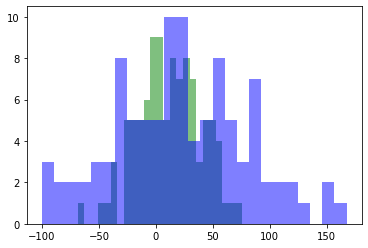

In [16]:
plt.hist(A, color='g', alpha=0.5, bins=25); 
plt.hist(B, color='b',  alpha=0.5, bins=25);

<div class="alert alert-info">
<b>Задание № 3 (Обязательно)</b>
Допустим вы решили устроить дачный эксперимент. Берем и поливаем одни огурцы водой, другие огурцы водой с удобнением, третью группу огурцов будем поливать минералкой. 
    
 - Используя дисперсионный анализ, сделайте выводы о распредлениях результатов. Есть ли эффект от удобрения по сравнению с минералкой? 
 - Помимо результата статистического теста, продемонстрируйте отличия визуально с помощью `boxplot` или `hist`
</div>

In [17]:
water = [1,2,3,4,2,4,2,4,5,2,3,4,2,1,3,4,3,2,5,1]
nutri = [1,2,4,6,5,6,7,5,4,5,6,7,4,3,5,5,6,5,4,3,5]
mineral =[2,1,1,3,2,4,2,4,5,4,3,2,3,2,3,1,3,4,5,1,4]

<div class="alert alert-info">
В данном случае нулевая гипотеза будет - Различий в способах полива огруцов нет ! 

In [18]:
F, p = f_oneway(water, nutri, mineral)  
print(F, p) 

alpha = 0.05 
if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

12.525963044834192 2.9240047906326866e-05
Разное распределение (отклоняем H0)


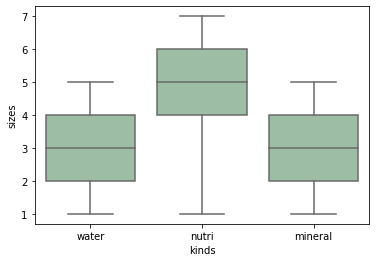

In [19]:
sizes = water + nutri +mineral
kinds = ['water']*len(water) + ['nutri']*len(nutri)+['mineral']*len(mineral)
df_cucumbers = pd.DataFrame()
df_cucumbers['sizes'] = sizes
df_cucumbers['kinds'] = kinds

ax = sns.boxplot(x='kinds', y='sizes', data=df_cucumbers, color='#99c2a2')
#ax = sns.swarmplot(x="kinds", y="sizes", data=df_mid, color='#7d0013')
plt.show()

### Вывод:
Эффект от полива удобрениями выше !

# Cookie Cats (Обязательно)

<div class="alert alert-info">
Cookie Cats - чрезвычайно популярная мобильная игра-головоломка, разработанная Tactile Entertainment. Это классическая игра-головоломка в стиле «соедините три», в которой игрок должен соединять плитки одного цвета, чтобы очистить поле и выиграть уровень. Здесь также есть поющие кошки. Посмотрите эту короткую демонстрацию:
</div>

<p style="align: center;"><img align=center src="https://i.ytimg.com/vi/iPxZIp0cbJE/maxresdefault.jpg"  width=500></p>
 
 
<p style="align: center;"><img align=center src="https://s3.amazonaws.com/assets.datacamp.com/production/project_184/img/cc_gates.png"  width=500></p>


<div class="alert alert-info">
По мере прохождения уровней игры игроки время от времени сталкиваются с воротами, которые заставляют их ждать нетривиальное количество времени или совершать покупки в приложении, чтобы продолжить. Помимо стимулирования покупок в приложении, эти ворота служат важной цели - дать игрокам вынужденный перерыв в игре, что, как мы надеемся, приведет к увеличению и продлению удовольствия от игры.
</div>

<div class="alert alert-info">
<b>Но где ставить ворота? </b>
Первоначально первые ворота были размещены на уровне 30. В этом проекте вам предлагается проанализировать AB-тест, в котором создатели переместили первые ворота в Cookie Cats с 30 уровня на уровень 40. В частности, вам надо рассмотрим влияние A/B теста на удержание игроков.
</div>

# Данные A/B тестирования

In [20]:
cookie_cats = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/cookie_cats.csv'

data = pd.read_csv(cookie_cats, error_bad_lines=False)  # Откроем датасет
data.head()

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


**Данные получены от 90 189 игроков, которые установили игру во время проведения AB-теста. Переменные:**

* `userid` - уникальный номер, идентифицирующий каждого игрока.

* `version` - был ли игрок помещен в контрольную группу (gate_30 - ворота на уровне 30) или в тестовую группу (gate_40 - ворота на уровне 40).

* `sum_gamerounds` - количество игровых раундов, сыгранных игроком в течение первой недели после установки
* `retention_1` - проигрыватель вернулся и поиграл через 1 день после установки?
* `retention_7` - проигрыватель вернулся и играл через 7 дней после установки?

Когда игрок устанавливал игру, ему случайным образом назначали `gate_30` или `gate_40`.

<div class="alert alert-info">
<b>Задание: провести анализ данных и сделать выводы о лучшем месте для установки ворот. </b>
    
Замечание: приведенных вспомогательных фрагментов кода не хватает для ответа на вопрос. 
Делать выводы необходимо опираясь на статистические тесты, разобранные в лекции. Большим плюсом будет построение визуализиции для подтверждения ваших выводом. Рекомендую использовать `seaborn` c его `sns.boxplot`/`sns.carplot`, `sns.barplot`, но можно обойтись и обычном `matplotlib`
</div>

In [21]:
#Сгрупируем результаты теста по версиям игры.
data.groupby('version').count()

,userid,sum_gamerounds,retention_1,retention_7
version,,,,
gate_30,44700,44700,44700,44700
gate_40,45489,45489,45489,45489


In [22]:
#Ваши выводы

In [23]:
# Разделим группы на  разные датафреймы по версиям
group_30 = data.loc[data.version == 'gate_30']
group_40 = data.loc[data.version == 'gate_40']

In [24]:
from scipy.stats import mannwhitneyu

#За нулевую гипотезу принимаем, что группы не отличаются . Проверим это с помощью критерия Манна Уитни
stat, p = mannwhitneyu(group_30['sum_gamerounds'], group_40['sum_gamerounds']) # U-тест Манна-Уитни
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Интерпретируем
alpha = 0.05   # Уровень значимости
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=1009027049.500, p=0.025
Разные распределения (отвергаем H0)


### Получаем что группы отличаются , теперь надо выявить какая группа лучше подходит для определения какие ворот оставлять. 

In [25]:
# Создаем списки с выборочно отобранными средними по версиям игры и retention
boot_1d = []
boot_7d = []
for i in range(1000):
    boot_mean_1 = data.sample(frac=1, replace=True).groupby('version')['retention_1'].mean()
    boot_mean_7 = data.sample(frac=1, replace=True).groupby('version')['retention_7'].mean()
    boot_1d.append(boot_mean_1)
    boot_7d.append(boot_mean_7)

# Преобразуем их в датафрейм  
boot_1d = pd.DataFrame(boot_1d)
boot_7d = pd.DataFrame(boot_7d)

<AxesSubplot:ylabel='Density'>

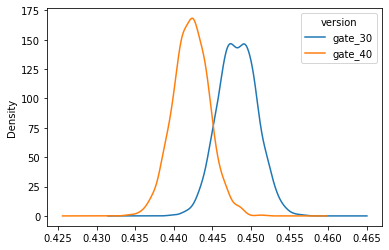

In [26]:
# Строим график по вовзрату клиентов через 1 день 
boot_1d.plot(kind='density')

<AxesSubplot:ylabel='Density'>

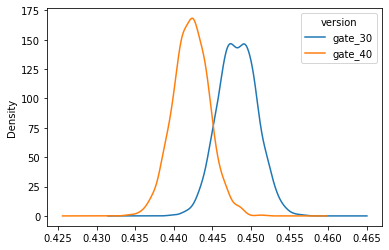

In [27]:
# Строим график по вовзрату клиентов через 7 дней 
boot_1d.plot(kind='density')

**Ваши выводы?** 

  ### Из полученных можно сделать вывод, что версия gate_30 дает больший приток игроков и удержание и через 1 день и через 1 неделю

# Покемоны и AB-тестирование 
(реальный кейс собеседования на позицию Аналитика).


# Описание задачи

![banner](https://storage.googleapis.com/kaggle-datasets-images/635/1204/126be74882028aac7241553cef0e27a7/dataset-original.jpg)

Покемоны - это маленькие существа, которые сражаются друг с другом на соревнованиях. Все покемоны имеют разные характеристики (сила атаки, защиты и т. д.) И относятся к одному или двум так называемым классам (вода, огонь и т. д.).
Профессор Оук является изобретателем Pokedex, портативного устройства, которое хранит информацию обо всех существующих покемонах. Как его ведущий специалист по данным, Вы только что получили от него запрос с просьбой осуществить аналитику данных на всех устройствах Pokedex. 

## Описание набора данных
Профессор Оук скопировал все содержимое память одного устройства Pokedex, в результате чего получился набор данных, с которым Вы будете работать в этой задаче. В этом файле каждая строка представляет характеристики одного покемона:

* `pid`: Numeric - ID покемона
* `HP`: Numeric - Очки здоровья
* `Attack`: Numeric - Сила обычной атаки
* `Defense`: Numeric - Сила обычной защиты
* `Sp. Atk`: Numeric - Сила специальной атаки
* `Sp. Def`: Numeric - Сила специальной защиты
* `Speed`: Numeric - Скорость движений
* `Legendary`: Boolean - «True», если покемон редкий
* `Class 1`: Categorical - Класс покемона
* `Class 2`: Categorical - Класс покемона

In [172]:
pokemon_path = 'https://raw.githubusercontent.com/a-milenkin/datasets_for_t-tests/main/pokemon.csv'
pokemon = pd.read_csv(pokemon_path, error_bad_lines=False)  # Откроем датасет
pokemon.sample(10)

#Обратите внимание, что у покемона может быть один или два класса. Если у покемона два класса, считается,
#что они имеют одинаковую значимость.

,pid,Name,Class 1,Class 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
16,17,Weedle,Bug,Poison,40,35,30,20,20,50,False
18,19,Beedrill,Bug,Poison,65,90,40,45,80,75,False
277,278,Combusken,Fire,Fighting,60,85,60,85,60,55,False
284,285,Poochyena,Dark,NaN,35,55,35,30,30,35,False
131,132,Mr. Mime,Psychic,Fairy,40,45,65,100,120,90,False
299,300,Taillow,Normal,Flying,40,55,30,30,30,85,False
789,790,Avalugg,Ice,NaN,95,117,184,44,46,28,False
297,298,Nuzleaf,Grass,Dark,70,70,40,60,40,60,False
65,66,Poliwag,Water,NaN,40,50,40,40,40,90,False
205,206,Aipom,Normal,NaN,55,70,55,40,55,85,False


# Задачи

<div class="alert alert-info">
<b>Задание № 1 (Обязательно):</b>
    
Профессор Оук подозревает, что покемоны в классе `grass` имеют более сильную обычную атаку, чем у покемонов в классе `rock`. Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
    
Примечание: если есть покемоны, которые относятся к обоим классам, просто выбросьте их;
    
Вы можете предположить, что распределение обычных атак является нормальным для всех классов покемонов.

</div>


In [103]:
# Сформируем датафреймы с нужными для анализа данными 
# Класс Grass
columns = ['pid', 'Attack', 'Class 1']
pokemon_grass = pokemon.loc[pokemon['Class 1'] == 'Grass'][columns]
pokemon_grass.sample(5)

,pid,Attack,Class 1
363,364,115,Grass
77,78,105,Grass
49,50,65,Grass
551,552,103,Grass
48,49,50,Grass


In [102]:
# Класс Rock
columns = ['pid', 'Attack', 'Class 1']
pokemon_rock = pokemon.loc[pokemon['Class 1'] == 'Rock'][columns]
pokemon_rock.sample(5)

,pid,Attack,Class 1
103,104,45,Rock
149,150,40,Rock
584,585,105,Rock
455,456,42,Rock
268,269,164,Rock


### За нулевую гипотезу принимаем, что сила атаки в группах не отличаются . Проверим это с помощью критерия Стьюдента. 

In [39]:
result = st.ttest_ind(pokemon_grass['Attack'], pokemon_rock['Attack'], equal_var=False)
print(result)

# Интерпретируем
alpha = 0.05   # Уровень значимости
if result.pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Ttest_indResult(statistic=-3.20601097459528, pvalue=0.002020656493869084)
Разные распределения (отвергаем H0)


### Отвергаем нулевую гипотезу и подтверждаем что сила атаки различается.   
###  В результате видим, что среднее класса Grass меньше на 3,2, значит у Rock атака сильнее !  
### Посмотрим на графике  визуальное различие .

In [106]:
pokemon_joined = pokemon_rock.merge(pokemon_grass, how='outer')
pokemon_joined.sample(10)

,pid,Attack,Class 1
59,169,82,Grass
94,555,45,Grass
11,266,64,Rock
82,452,30,Grass
28,529,55,Rock
21,381,125,Rock
81,435,109,Grass
63,205,55,Grass
76,363,85,Grass
100,608,67,Grass


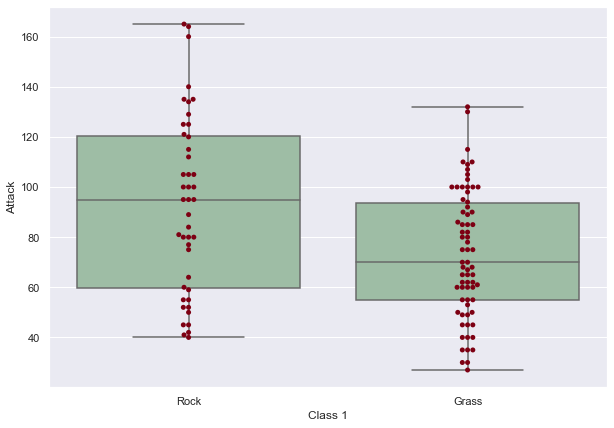

In [109]:
sns.set(rc={'figure.figsize':(10, 7)}) 
ax = sns.boxplot(x=pokemon_joined['Class 1'], y=pokemon_joined['Attack'], data=pokemon_joined, color='#99c2a2')
ax = sns.swarmplot(x=pokemon_joined['Class 1'], y=pokemon_joined['Attack'], data=pokemon_joined, color='#7d0013')
plt.show()

<div class="alert alert-info">
<b>Задание № 2 (Обязательно):</b>
    
Профессор Оук уже долго не может спать по ночам ведь его волнует вопрос, а правда, что покемоны покемоны в классе `Water` в среднем более быстрые, чем покемоны в классе `Normal`. 
    
    
Проверьте, прав ли он, и убедите его в своем выводе статистически.
    
Примечание: если есть покемоны относятся к обоим классам, выбросьте их;
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [157]:
# Сформируем датафреймы с нужными для анализа данными 
# Класс Water
columns = ['pid', 'Speed', 'Class 1']
pokemon_Water = pokemon.loc[pokemon['Class 1'] == 'Water'][columns]
pokemon_Water.sample(5)

,pid,Speed,Class 1
350,351,60,Water
140,141,81,Water
79,80,100,Water
65,66,90,Water
249,250,85,Water


In [158]:
# Класс Normal
columns = ['pid', 'Speed', 'Class 1']
pokemon_Normal = pokemon.loc[pokemon['Class 1'] == 'Normal'][columns]
pokemon_Normal.sample(5)

,pid,Speed,Class 1
591,592,50,Normal
479,480,85,Normal
634,635,115,Normal
20,21,56,Normal
261,262,55,Normal


In [162]:
# За нулевую гипотезу принимаем, что скорость в группах не отличаются . Проверим это с помощью критерия Стьюдента. 
# В резульате видим, что среднее класса ??? меньше на ???
result_2 = st.ttest_ind(pokemon_Water['Speed'], pokemon_Normal['Speed'], equal_var=False)
print(result_2)

# Интерпретируем
alpha = 0.05   # Уровень значимости
if result_2.pvalue > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Ttest_indResult(statistic=-1.5515751280920234, pvalue=0.12245787138204893)
Одинаковые распределения (не отвергаем H0)


### Не отвергаем нулевую гипотезу скорость в классах статистически значимо не различаются . Посмотрим на графике  визуальное различие .

In [163]:
pokemon_joined_2 = pokemon_Water.merge(pokemon_Normal, how='outer')
pokemon_joined_2.sample(10)

,pid,Speed,Class 1
194,581,93,Normal
15,95,70,Water
168,385,40,Normal
159,319,48,Normal
198,635,115,Normal
181,490,91,Normal
207,729,78,Normal
196,592,50,Normal
28,142,81,Water
128,122,50,Normal


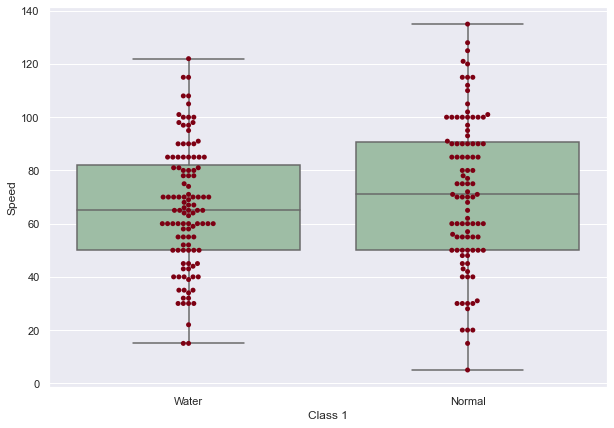

In [165]:
sns.set(rc={'figure.figsize':(10, 7)}) 
ax = sns.boxplot(x=pokemon_joined_2['Class 1'], y=pokemon_joined_2['Speed'], data=pokemon_joined_2, color='#99c2a2')
ax = sns.swarmplot(x=pokemon_joined_2['Class 1'], y=pokemon_joined_2['Speed'], data=pokemon_joined_2, color='#7d0013')
plt.show()

<div class="alert alert-info">
<b>Задание № 3:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

<div class="alert alert-info">
<b>Задание № 4:</b>
    
Профессор Оук тот еще безумец. Он изобрел сыворотку, способную ускорить покемона. Однако, мы усомнились в эффективности его вакцины. Професоор дал эту сыворотку следующим покемонам: смотри массив `treathed_pokemon`. Проверьте, работает ли вообще его сыворотка, убедите всех в своем выводе статистически.
    
    
Вы можете предположить, что распределение скорости движения является нормальным для всех классов покемонов.

</div>

In [ ]:
# Покемоны, которые принимали сыворотку увеличения скорости
treathed_pokemon = ['Mega Beedrill','Mega Alakazam', 'Deoxys Normal Forme', 'Mega Lopunny']

<div class="alert alert-info">
<b>Задание № 5:</b>
    
Профессор Оук всегда любил истории про легендарных покемонов. Однако, профессор не очень уверен, что они самые лучшие относительно остальных покемонов. Оук предложил разобраться в этом нам. Проверьте, действительно ли сумма характеристик `HP`,`Attack`,`Defense` у легендарных покемонов выше, чем у других покемонов? А произведение этих же параметров?? Найдите ответы на эти вопросы и убедите всех в своем выводе статистически.
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

<div class="alert alert-info">
<b>Задание № 6:</b>
    
Профессор Оук частенько наблюдает за боями покемонов. После очередных таких боев Оук выделил три класса `best_defence_class`, которые на его взгляд одинаковы по "силе обычной защиты" `Defense`. Проверьте, действительно ли эти классы покемонов не отличаются по уровню защиты статистически значимо? Все та же статистика вам в помощь! 
   

Вы можете предположить, что распределение сум и произведений этих параметров является нормальным для всех классов покемонов.

</div>

In [ ]:
best_defence_class = ['Rock', 'Ground','Steel','Ice']
best_defence_class